In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

In [2]:
def Gauss(x, mu, sig, A):
    return A  *np.exp(-0.5 * ((x-mu)/sig)**2) #*1/(np.sqrt(2 * np.pi * sig **2))

def Hist(holes, split=False):
    a=(np.genfromtxt(str(holes)+".dat", delimiter =" ")).flatten()
    high=a[a>300]
    low=a[a<300]

    #plt.hist(low, bins='auto',label="Data")
    bin_heights, bin_borders, _ = plt.hist(low, bins='auto')
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    popt, _ = curve_fit(Gauss, bin_centers, bin_heights, p0=[0.01, 0.009, 100])
    
    textstr=str(holes)+": Mu= " + str(np.round(popt[0], 6)) + ", Sigma= "+ str(np.round(popt[1], 6))

    x=np.linspace(bin_borders[0], bin_borders[-1], 10000)
    plt.plot(x,  Gauss(x, *popt), label=textstr)
    plt.legend()
    plt.title(str(holes) + " holes")

    plt.savefig("./figures/" +str(holes)+ ".png")
    plt.show()
    #print(popt[2])

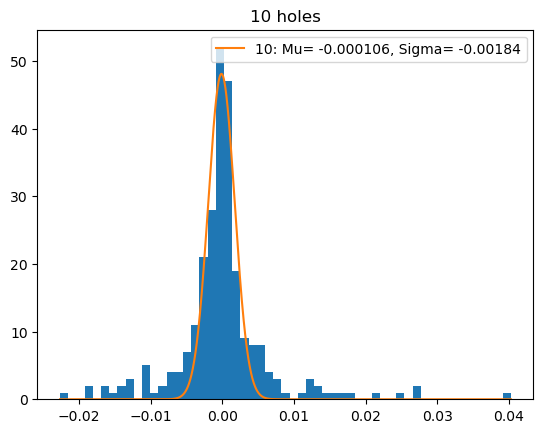

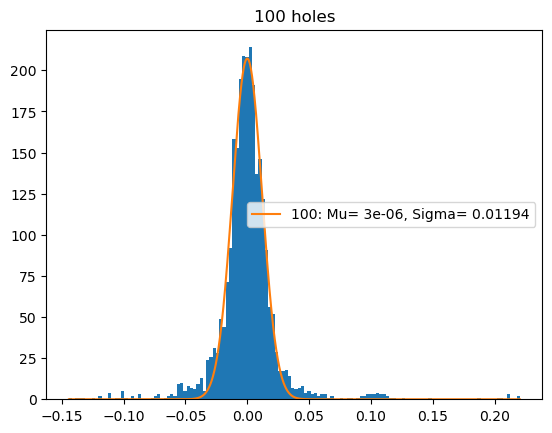

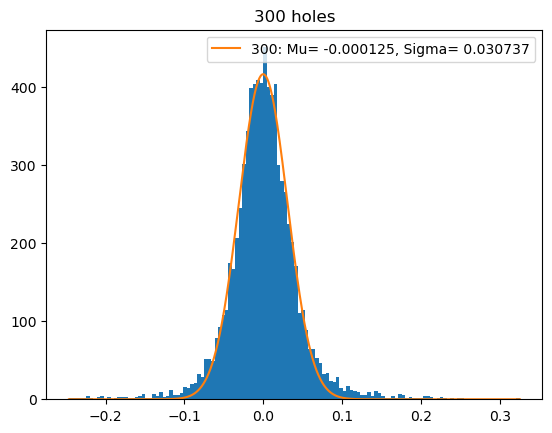

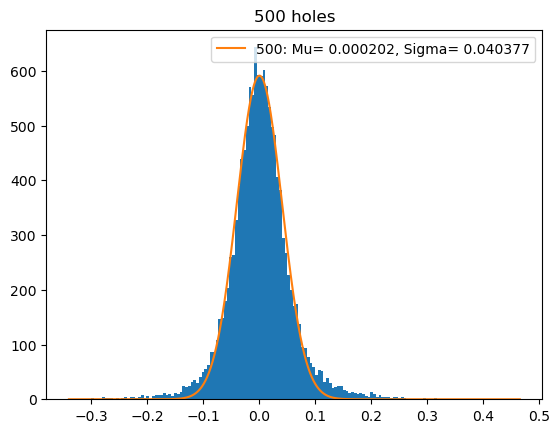

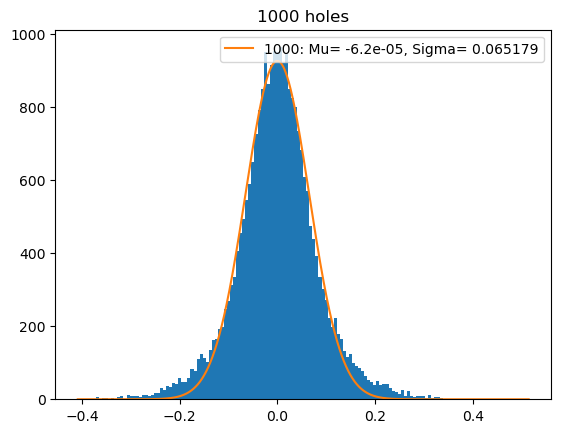

In [3]:
holes =[10,100,300,500,1000]
for i in holes:
     Hist(i)

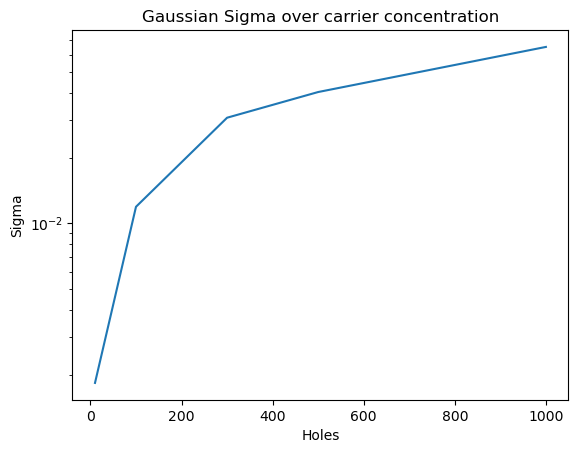

In [4]:
opt=[0.001839759620007602,0.01193982300618631,0.030737166577818976,0.04037695418603293,0.06517917241055983]
plt.plot(holes, opt)
plt.yscale("log")
plt.xlabel("Holes")
plt.ylabel("Sigma")
plt.title("Gaussian Sigma over carrier concentration")
plt.savefig("figures/Sigma")
plt.show()

def Hist(holes, split=False):
    a=np.genfromtxt(str(holes)+".dat", delimiter =" ").flatten()
    high=a[a>300]
    low=a[a<300]
    
    if (split == False) or (len(high)==0):
        plt.hist(a, label="Data")
        
        mu, sig = norm.fit(a)
        textstr="Mu= " + str(np.round(mu, 6)) + ", Sigma= "+ str(np.round(sig, 6))
        x=np.arange(np.min(a), np.max(a), 0.001)
        plt.plot(x,  norm.pdf(x, mu, sig), label=textstr)
        plt.legend()
        plt.title(str(holes) + " holes")
    else:
        fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
        axs[0].hist(low, label="Data")
        axs[0].title.set_text(str(holes) + " holes (" + str(len(low))+" low values)")
        
        mu0, sig0 = norm.fit(low)
        textstr="Mu= " + str(np.round(mu0, 6)) + ", Sigma= "+ str(np.round(sig0, 6))
        x=np.arange(np.min(low), np.max(low), 0.001)
        axs[0].plot(x,  norm.pdf(x, mu0, sig0), label=textstr)
        axs[0].legend()
        
        
        axs[1].hist(high, label="Data")
        axs[1].title.set_text(str(holes) + " holes (" + str(len(high))+" high values)")
        mu, sig = norm.fit(high)
        textstr="Mu= " + str(np.round(mu, 6)) + ", Sigma= "+ str(np.round(sig, 6))
        x=np.arange(np.min(high), np.max(high), 0.001)
        axs[1].plot(x,  norm.pdf(x, mu, sig), label=textstr)
        axs[1].legend()
    plt.savefig("./figures/" +str(holes)+ ".png")
    plt.show()

In [5]:
def AbsGauss(x, mu, sig, A):
    return np.abs(A  *np.exp(-0.5 * ((x-mu)/sig)**2)) #*1/(np.sqrt(2 * np.pi * sig **2))

def AbsHist(holes, split=False):
    a=np.abs(np.genfromtxt(str(holes)+".dat", delimiter =" ")).flatten()
    high=a[a>300]
    low=a[a<300]

    #plt.hist(low, bins='auto',label="Data")
    bin_heights, bin_borders, _ = plt.hist(low, bins='auto')
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    popt, _ = curve_fit(AbsGauss, bin_centers, bin_heights, p0=[0.000001, 0.09, 100])
    
    textstr=str(holes)+": Mu= " + str(np.round(popt[0], 6)) + ", Sigma= "+ str(np.round(popt[1], 6))

    x=np.linspace(bin_borders[0], bin_borders[-1], 10000)
    plt.plot(x,  AbsGauss(x, *popt), label=textstr)
    plt.legend()
    plt.title(str(holes) + " holes")

    plt.savefig("./figures/" +str(holes)+ "(abs).png")
    plt.show()
    #print(popt[1])

C:\conda\lib\site-packages\scipy-1.10.0-py3.10-win-amd64.egg\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


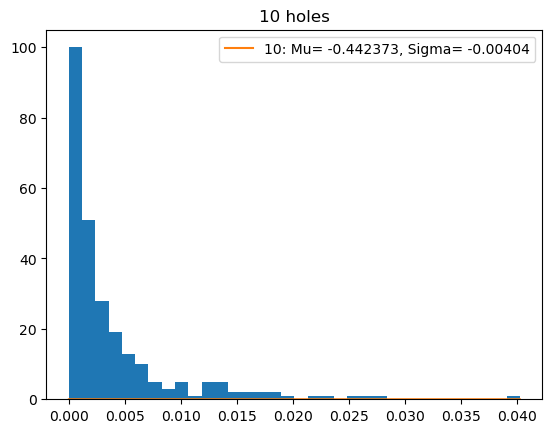

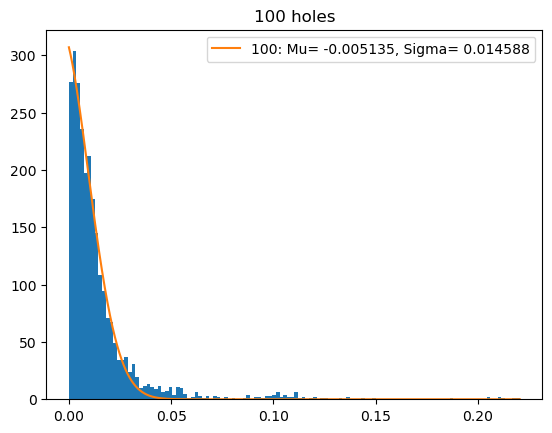

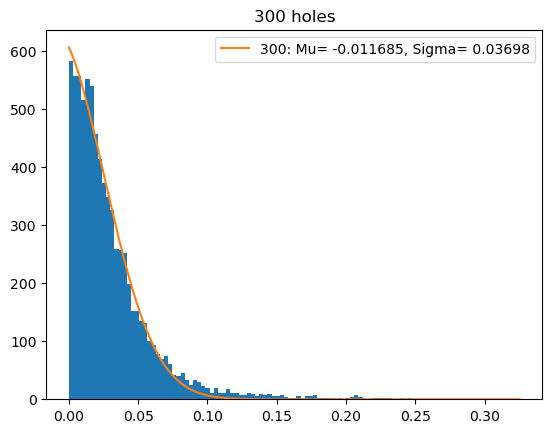

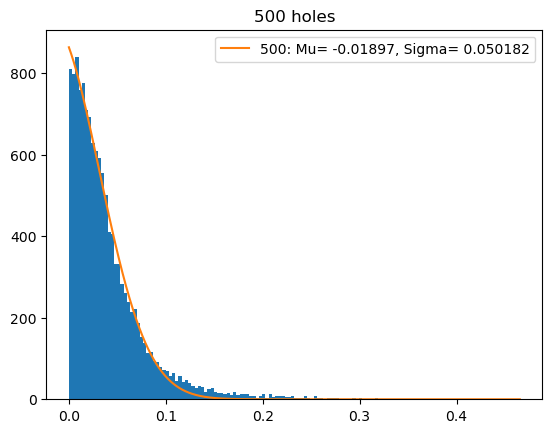

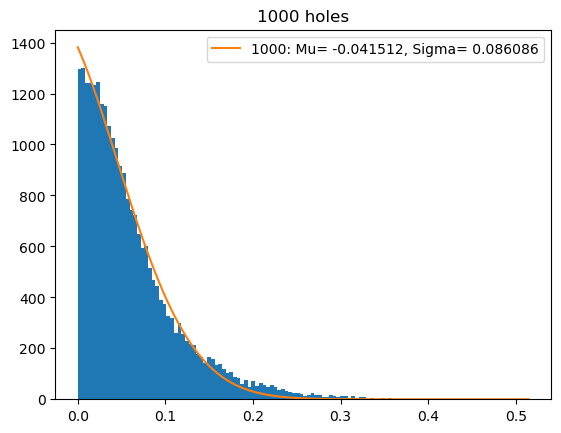

In [6]:
holes =[10,100,300,500,1000]
for i in holes:
     AbsHist(i)